In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('only_road_accidents_data3.csv')
df.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [3]:
print(df['STATE/UT'].unique())

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


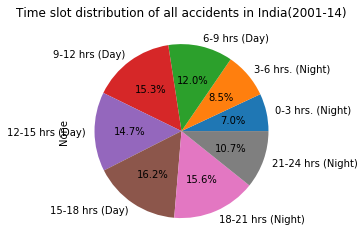

In [4]:
df2=df[df.columns[2:10]].sum(axis=0)
#print(df2)
df2.plot.pie(title='Time slot distribution of all accidents in India(2001-14)',autopct='%1.1f%%')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

<Figure size 1080x360 with 0 Axes>

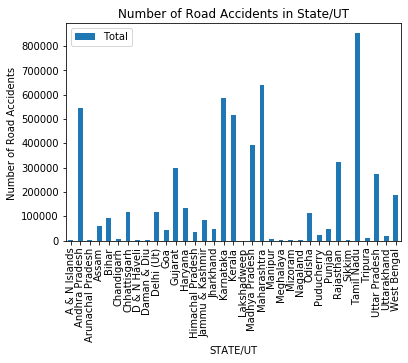

In [14]:

df3=df.loc[:,['STATE/UT','Total']].groupby(['STATE/UT']).sum(axis=0)
#df3.plot.bar(title="State wise accidents")
plt.figure(figsize=(15,5))
df3.plot(kind='bar')
plt.xlabel("STATE/UT")
plt.ylabel("Number of Road Accidents ")
plt.title("Number of Road Accidents in State/UT")
plt.xticks(rotation=90)

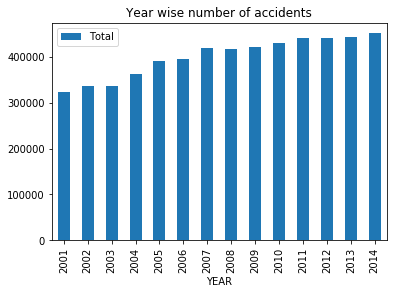

In [6]:
df4=df.loc[:,['YEAR','Total']].groupby(['YEAR']).sum(axis=0)
df4.plot.bar(title="Year wise number of accidents")

In [15]:

def top_n_state_over_year(top, year):
    df_state = df.loc[:, ['YEAR', 'STATE/UT', 'Total']]
    df_state = df_state[df_state['YEAR'] == year].groupby(['STATE/UT']).sum()\
    .sort_values(by=['YEAR', 'Total'], ascending=[True,False]).head(top)
    plt.figure(figsize=(10,5))
    sns.barplot(x="STATE/UT", y="Total", data=df_state)
    plt.title(f"Top {top} States/UT (Road Accidents in Year {year})")
    plt.xlabel("STATE/UT")
    plt.ylabel("Number of Road Accidents")
    plt.xticks(rotation=90)
    return;

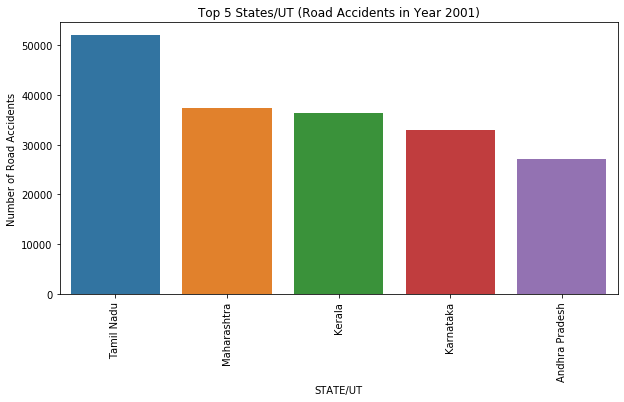

In [16]:
top_n_state_over_year(5, 2001)

In [17]:
def least_n_state_over_year(least, year):
    df_state = df.loc[:, ['YEAR', 'STATE/UT', 'Total']]
    df_state = df_state[df_state['YEAR'] == year].groupby(['STATE/UT']).sum()\
    .sort_values(by=['YEAR', 'Total'], ascending=[True,True]).head(least)
    plt.figure(figsize=(10,5))
    sns.barplot(x="STATE/UT", y="Total", data=df_state)
    plt.title(f"Least {least} States/UT (Road Accidents in Year {year})")
    plt.xlabel("STATE/UT")
    plt.ylabel("Number of Road Accidents")
    plt.xticks(rotation=90)
    return;

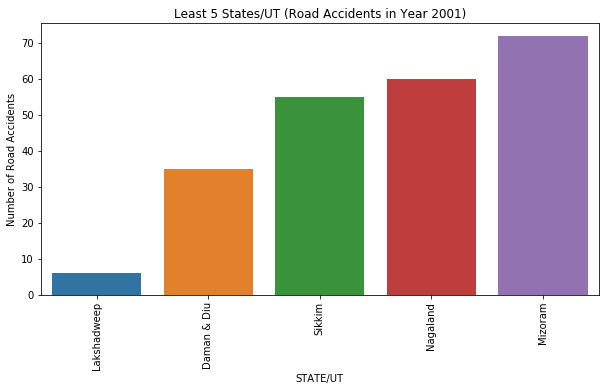

In [18]:
least_n_state_over_year(5, 2001)

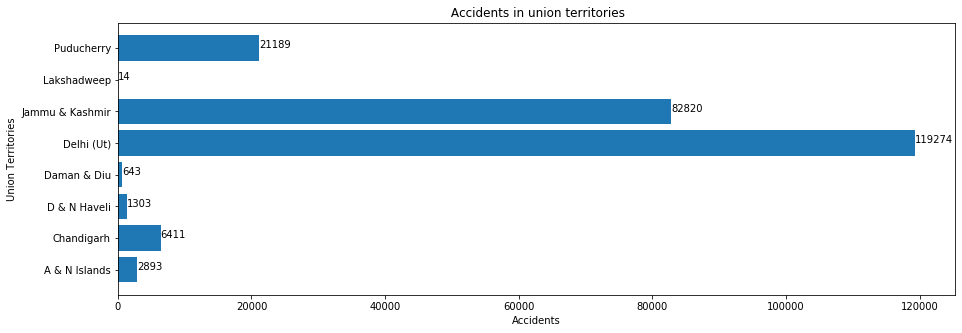

In [49]:
UT=['A & N Islands' ,'Chandigarh' , 'D & N Haveli' ,'Daman & Diu' ,'Delhi (Ut)','Jammu & Kashmir', 'Lakshadweep', 'Puducherry']
df7=df.loc[df['STATE/UT'].isin(UT)]
df7=df7.loc[:,['STATE/UT','Total']].groupby(['STATE/UT'])['Total'].sum().reset_index()
index=np.arange(len(UT))
plt.figure(figsize=(15,5))
plt.barh(index,df7['Total'])
plt.ylabel('Union Territories')
plt.xlabel('Accidents')
plt.title(' Accidents in union territories')
plt.yticks(index,UT )  
for index, value in enumerate(df7['Total']):
    plt.text(value, index, str(value))
plt.show()

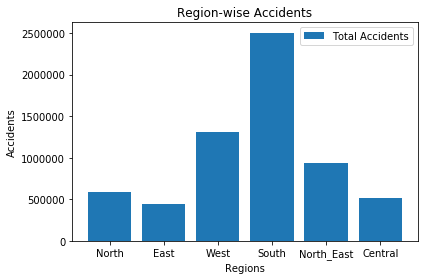

In [13]:
North=['Haryana', 'Himachal Pradesh' ,'Jammu & Kashmir','Punjab' ,'Uttar Pradesh', 'Uttarakhand']
East=['Bihar', 'Jharkhand', 'Odisha', 'West Bengal']
South=[ 'Andhra Pradesh' , 'Karnataka', 'Kerala', 'Tamil Nadu']
West=[ 'Goa', 'Gujarat','Maharashtra' , 'Rajasthan']
Central=['Chhattisgarh' ,'Madhya Pradesh']
North_East=[ 'Assam', 'Manipur', 'Meghalaya', 'Mizoram' ,'Nagaland', 'Sikkim' ,'Tamil Nadu', 'Tripura']
df8=df.loc[df['STATE/UT'].isin(North)]
x1=df8.loc[:,['Total']].sum(axis=0)

df8=df.loc[df['STATE/UT'].isin(East)]
x2=df8.loc[:,['Total']].sum(axis=0)

df8=df.loc[df['STATE/UT'].isin(West)]
x3=df8.loc[:,['Total']].sum(axis=0)

df8=df.loc[df['STATE/UT'].isin(South)]
x4=df8.loc[:,['Total']].sum(axis=0)

df8=df.loc[df['STATE/UT'].isin(North_East)]
x5=df8.loc[:,['Total']].sum(axis=0)
df8=df.loc[df['STATE/UT'].isin(Central)]
x6=df8.loc[:,['Total']].sum(axis=0)

y=[x1['Total'],x2['Total'],x3['Total'],x4['Total'],x5['Total'],x6['Total']]
x=('North','East','West','South','North_East','Central' )
index = np.arange(len(x))
plt.bar(index, y,label="Total Accidents")

plt.xlabel('Regions')
plt.ylabel('Accidents')
plt.title('Region-wise Accidents')
plt.xticks(index,x )  
plt.legend()

plt.tight_layout()
plt.show()


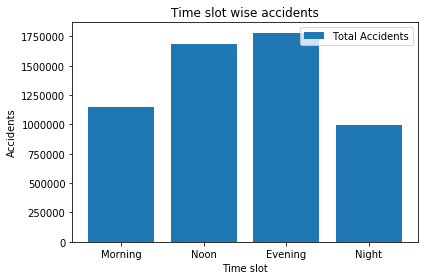

In [5]:
morning=df["3-6 hrs. (Night)"] .sum()+ df["6-9 hrs (Day)"].sum()
noon=df["9-12 hrs (Day)"].sum()+ df["12-15 hrs (Day)"].sum()
evening=df["15-18 hrs (Day)"].sum()+ df["18-21 hrs (Night)"].sum()
night=df["21-24 hrs (Night)"].sum()+ df["0-3 hrs. (Night)"].sum()
y=(morning,noon,evening,night)
x=('Morning','Noon','Evening','Night')
index=np.arange(len(x))
plt.bar(index, y,label="Total Accidents")

plt.xlabel('Time slot')
plt.ylabel('Accidents')
plt.title('Time slot wise accidents')
plt.xticks(index,x )  
plt.legend()

plt.tight_layout()
plt.show()

